In [56]:
import os
import pickle as pk

import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA
import numpy as np

In [62]:
with open(os.path.join("..", "data", "zinc_random_100000_fingerprints.pk"), "rb") as f:
    zinc_fps = np.array(pk.load(f)).squeeze()

In [63]:
zinc_fps.shape

(100000, 740)

In [29]:
with open(os.path.join("..", "data", "BACE_fingerprints.pk"), "rb") as f:
    bace_fps = np.array(pk.load(f)).squeeze()

In [30]:
with open(os.path.join("..", "data", "ClinTox_fingerprints.pk"), "rb") as f:
    clintox_fps = np.array(pk.load(f)).squeeze()

In [31]:
bace_fps.shape

(1513, 740)

In [32]:
clintox_fps.shape

(1477, 740)

In [53]:
tsne = manifold.TSNE(n_components=2, init='random', random_state=0, n_iter=10000)

In [54]:
y = tsne.fit_transform(np.concatenate([zinc_fps, bace_fps, clintox_fps], axis=0))

In [35]:
colors = [0] * zinc_fps.shape[0] + [1] * bace_fps.shape[0] + [2] * clintox_fps.shape[0]

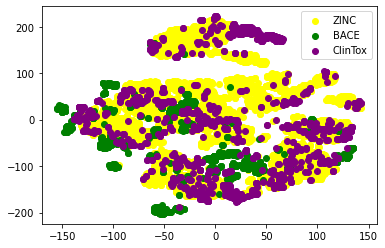

In [55]:
fig, ax = plt.subplots()
ax.scatter(y[:10000, 0], y[:10000, 1], c="yellow", label="ZINC")
ax.scatter(y[10000:11513, 0], y[10000:11513, 1], c="green", label="BACE")
ax.scatter(y[11513:, 0], y[11513:, 1], c="purple", label="ClinTox")
ax.legend()
fig.savefig(os.path.join("..","logs","ZINC10k_BACE_ClinTox_tsne_4.jpg"), dpi=300)

In [64]:
pca = PCA(n_components=2)

In [65]:
y_reduced = pca.fit_transform(np.concatenate([zinc_fps, bace_fps, clintox_fps], axis=0))

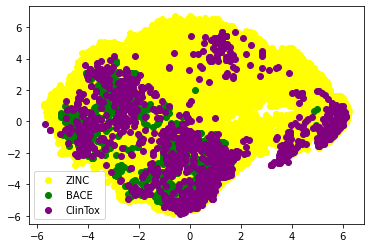

In [66]:
fig2, ax2 = plt.subplots()
ax2.scatter(y_reduced[:100000, 0], y_reduced[:100000, 1], c="yellow", label="ZINC")
ax2.scatter(y_reduced[100000:101513, 0], y_reduced[100000:101513, 1], c="green", label="BACE")
ax2.scatter(y_reduced[101513:, 0], y_reduced[101513:, 1], c="purple", label="ClinTox")
ax2.legend()
fig2.savefig(os.path.join("..","logs","ZINC10k_BACE_ClinTox_pca_1.jpg"), dpi=300)